In [48]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#
#
#Download netuser data from S3 url
!wget https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_im_step2_01_07.dat
!wget https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_im_step2_08_14.dat

converted 'https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_im_step2_01_07.dat' (ANSI_X3.4-1968) -> 'https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_im_step2_01_07.dat' (UTF-8)
--2015-11-15 23:47:22--  https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_im_step2_01_07.dat
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 54.231.242.138
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|54.231.242.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1152667137 (1.1G) [application/octet-stream]
Saving to: 'netuser_im_step2_01_07.dat'

netuser_im_step2_01 100%[=====================>]   1.07G  80.3MB/s   in 14s    

2015-11-15 23:47:35 (80.8 MB/s) - 'netuser_im_step2_01_07.dat' saved [1152667137/1152667137]

converted 'https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_im_step2_08_14.dat' (ANSI_X3.4-1968) -> 'https://s3-ap-southeast-1.amazonaws.com/shiyanbigdat

In [4]:
!wget https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_im_step2_15_21.dat  
!wget https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_im_step2_22_28.dat

converted 'https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_im_step2_15_21.dat' (ANSI_X3.4-1968) -> 'https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_im_step2_15_21.dat' (UTF-8)
--2015-11-15 23:50:31--  https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_im_step2_15_21.dat
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 54.231.241.134
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|54.231.241.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1226407241 (1.1G) [application/octet-stream]
Saving to: 'netuser_im_step2_15_21.dat'

netuser_im_step2_15 100%[=====================>]   1.14G  77.7MB/s   in 15s    

2015-11-15 23:50:46 (78.2 MB/s) - 'netuser_im_step2_15_21.dat' saved [1226407241/1226407241]

converted 'https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_im_step2_22_28.dat' (ANSI_X3.4-1968) -> 'https://s3-ap-southeast-1.amazonaws.com/shiyanbigdat

In [6]:
!wget https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_im_step1_01_28.dat

converted 'https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_im_step1_01_28.dat' (ANSI_X3.4-1968) -> 'https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_im_step1_01_28.dat' (UTF-8)
--2015-11-15 23:53:15--  https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_im_step1_01_28.dat
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 54.231.242.142
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|54.231.242.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1092130689 (1.0G) [application/octet-stream]
Saving to: 'netuser_im_step1_01_28.dat'

netuser_im_step1_01 100%[=====================>]   1.02G  84.6MB/s   in 12s    

2015-11-15 23:53:27 (87.7 MB/s) - 'netuser_im_step1_01_28.dat' saved [1092130689/1092130689]



In [3]:
#read in all datasets from local drive
table1 = pd.read_table("netuser_im_step2_01_07.dat", sep ="\t", header = None)
table2 = pd.read_table("netuser_im_step2_08_14.dat", sep ="\t", header = None)

In [5]:
table3 = pd.read_table("netuser_im_step2_15_21.dat", sep ="\t", header = None)
table4 = pd.read_table("netuser_im_step2_22_28.dat", sep ="\t", header = None)

In [7]:
table0 = pd.read_table("netuser_im_step1_01_28.dat", sep ="\t", header = None)

In [8]:
#check length of combined dataset
len(table0) + len(table1) + len(table1) + len(table2) + len(table3) + len(table4)

290819516

In [9]:
#stack the netuser tables
stacked_netuser = pd.concat([table0, table1, table2, table3, table4])
IM_table = stacked_netuser

In [ ]:
####a sample of the IM dataset
IM_table = pd.read_table("netuser_im_step1_01_28.dat", sep ="\t", header = None, nrows = 100)

In [10]:
IM_table.columns=['DATE','EGOID','ALTERID','ACTIVITY_CODE','COUNT']

In [11]:
IM_table.shape

(241740142, 5)

In [12]:
#view first 5 rows of dataset
IM_table.head()

,DATE,EGOID,ALTERID,ACTIVITY_CODE,COUNT
0,6,40,4708423,S,1
1,18,40,9090085,R,6
2,18,40,9090085,S,11
3,19,40,9090085,S,3
4,19,40,9090085,R,4


In [13]:
#look at the descriptive characterisitcs of continuous var
IM_table.describe()

,DATE,EGOID,ALTERID,COUNT
count,2.417401e+08,2.417401e+08,2.417401e+08,2.417401e+08
mean,1.692004e+01,1.374919e+07,1.374778e+07,1.626190e+01
std,7.942826e+00,7.942343e+06,7.938504e+06,5.509436e+01
min,1.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00
25%,8.000000e+00,6.869506e+06,6.875854e+06,1.000000e+00
50%,1.500000e+01,1.375243e+07,1.374811e+07,3.000000e+00
75%,2.100000e+01,2.063140e+07,2.061675e+07,1.100000e+01
max,2.800000e+01,2.750000e+07,2.750000e+07,8.078100e+04


In [14]:
#look at descriptive characteristics fo categorical var
IM_table.groupby('ACTIVITY_CODE').ACTIVITY_CODE.count()

ACTIVITY_CODE
A     16101861
R    113565111
S    112073170
Name: ACTIVITY_CODE, dtype: int64

In [15]:
#remove those rows with activity_code = 'A'. 
#'R'is received, 'S' is sent
IM_table = IM_table[IM_table.ACTIVITY_CODE!='A']
IM_table.groupby('ACTIVITY_CODE').ACTIVITY_CODE.count()

ACTIVITY_CODE
R    113565111
S    112073170
Name: ACTIVITY_CODE, dtype: int64

In [17]:
#look at how many unique dates and their count are in the dataset
IM_table.groupby('DATE').DATE.count()

DATE
1      1555951
2      1536208
3      1522005
4      1630191
5      1499505
6      1282973
7     47254425
8      1574698
9      1607364
10     1588085
11     1528621
12     1436118
13     1258064
14    47179601
15     1516737
16     1546808
17     1541118
18     1558809
19     1531673
20     1286969
21    48169139
22     1640745
23     1600049
24     1620811
25     1590710
26     1531213
27     1298037
28    46751654
Name: DATE, dtype: int64

In [18]:
#We are not doing longitudinal analysis, so we will drop the date variable
IM_table = IM_table.drop('DATE',1)

In [19]:
#Combine rows which have the same pairs of ids and same activity codes. Add up their count.
IM_grouped = IM_table.groupby(['EGOID','ALTERID','ACTIVITY_CODE']).sum()
#put back the column names
IM_grouped = IM_grouped.reset_index()

In [20]:
IM_table = IM_grouped

In [21]:
IM_table.head()

,EGOID,ALTERID,ACTIVITY_CODE,COUNT
0,3,674190,R,1
1,3,1207040,R,98
2,3,1207040,S,80
3,3,1247524,R,1
4,3,2833540,S,1


In [ ]:
#Code to check if there is overlap between pairs of users
#Direction of IM exchange is already indicated using activity code. 
#e.g. of overlap: 
# egoid: 1, alterid = 3, activity code = r
# egoid: 3, alterid = 1, activity code = s
# this step is VERY processing intensive... 
NN = table1.ix[:,[1,2]]
tuplesNN = [tuple(x) for x in NN.values]
MM = [(x,y) for x, y in tuplesNN if (y,x) in tuplesNN]

In [22]:
#
#
#Download netuser gdata from S3 url
!wget https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_userdata.dat

converted 'https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_userdata.dat' (ANSI_X3.4-1968) -> 'https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_userdata.dat' (UTF-8)
--2015-11-16 00:13:17--  https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_userdata.dat
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 54.231.243.146
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|54.231.243.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 702784479 (670M) [application/octet-stream]
Saving to: 'netuser_userdata.dat'

netuser_userdata.da 100%[=====================>] 670.23M  77.1MB/s   in 8.4s   

2015-11-16 00:13:26 (79.5 MB/s) - 'netuser_userdata.dat' saved [702784479/702784479]



In [23]:
#Read in netuser data from local drive
netuser_table = pd.read_table("netuser_userdata.dat", sep ="\t", header = None)

In [18]:
#a sample of the netuser data
netuser_table = pd.read_table("netuser_userdata.dat", sep ="\t", header = None, nrows = 200)

In [24]:
#Assign column names
netuser_table.columns=['USERID', 'SYSID','LISTID','PRIORGO','HASREG','GENDER','AGEYR','COUNTRY']
#Drop columns that will not be used
netuser_table = netuser_table.ix[:,['USERID','GENDER','AGEYR','COUNTRY']]

In [25]:
netuser_table.shape

(27479537, 4)

In [26]:
netuser_table.head()

,USERID,GENDER,AGEYR,COUNTRY
0,0,1,27,238
1,1,1,21,238
2,2,-1,-1,-1
3,3,1,39,238
4,4,1,29,63


In [27]:
#
#
#Download netuser ygodata from S3 url
!wget https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_ygo_01_07.dat
!wget https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_ygo_08_14.dat

converted 'https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_ygo_01_07.dat' (ANSI_X3.4-1968) -> 'https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_ygo_01_07.dat' (UTF-8)
--2015-11-16 00:16:32--  https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_ygo_01_07.dat
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 54.231.241.138
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|54.231.241.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18306291 (17M) [application/octet-stream]
Saving to: 'netuser_ygo_01_07.dat'

netuser_ygo_01_07.d 100%[=====================>]  17.46M  61.9MB/s   in 0.3s   

2015-11-16 00:16:32 (61.9 MB/s) - 'netuser_ygo_01_07.dat' saved [18306291/18306291]

converted 'https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_ygo_08_14.dat' (ANSI_X3.4-1968) -> 'https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_ygo_08_14.dat' (UTF-8)
--20

In [28]:
!wget https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_ygo_15_21.dat  
!wget https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_ygo_22_28.dat

converted 'https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_ygo_15_21.dat' (ANSI_X3.4-1968) -> 'https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_ygo_15_21.dat' (UTF-8)
--2015-11-16 00:16:40--  https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_ygo_15_21.dat
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 54.231.241.134
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|54.231.241.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19937314 (19M) [application/octet-stream]
Saving to: 'netuser_ygo_15_21.dat'

netuser_ygo_15_21.d 100%[=====================>]  19.01M  79.6MB/s   in 0.2s   

2015-11-16 00:16:40 (79.6 MB/s) - 'netuser_ygo_15_21.dat' saved [19937314/19937314]

converted 'https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_ygo_22_28.dat' (ANSI_X3.4-1968) -> 'https://s3-ap-southeast-1.amazonaws.com/shiyanbigdata/netuser_ygo_22_28.dat' (UTF-8)
--20

In [29]:
#Read in ygo data from local drive
ygo_table1 = pd.read_table("netuser_ygo_01_07.dat", sep ="\t", header = None)
ygo_table2 = pd.read_table("netuser_ygo_08_14.dat", sep ="\t", header = None)
ygo_table3 = pd.read_table("netuser_ygo_15_21.dat", sep ="\t", header = None)
ygo_table4 = pd.read_table("netuser_ygo_22_28.dat", sep ="\t", header = None)

In [30]:
#Stack the ygo tables
ygo_table = pd.concat([ygo_table1, ygo_table2, ygo_table3, ygo_table4])

In [19]:
#a sample of the ygo data
ygo_table = pd.read_table("netuser_ygo_01_07.dat", sep ="\t", header = None, nrows = 200)

In [31]:
ygo_table.columns=['DATE','USERID','FIRSTGO','DEVID','PCTPV','GOPV','FPPV','MAILPV','SRCHPV','WTHRPV','NEWSPV','FINPV','SPORTSPV','FLICKRPV']

In [34]:
#Remove columns that will not be used, and remove duplicates for USERIDs, taking on True FIRSTGO flag if present
ygo_table = ygo_table.ix[:,['USERID','FIRSTGO']].groupby('USERID').max()
ygo_table = ygo_table.reset_index()

In [35]:
ygo_table.head()

,USERID,FIRSTGO
0,40,1
1,108,1
2,121,1
3,130,1
4,386,1


In [32]:
ygo_table.shape

(1951207, 14)

In [36]:
#Merge the netuser and ygo tables
merged_user = pd.merge(netuser_table, ygo_table, how = 'outer')

In [37]:
merged_user.head()

,USERID,GENDER,AGEYR,COUNTRY,FIRSTGO
0,0,1,27,238,NaN
1,1,1,21,238,NaN
2,2,-1,-1,-1,NaN
3,3,1,39,238,NaN
4,4,1,29,63,NaN


In [38]:
#recode and replace values in user details
merged_user['GENDER'] = merged_user['GENDER'].replace([1, 0, -1], ['M','F', np.nan])
merged_user['FIRSTGO'] = merged_user['FIRSTGO'].replace(np.nan, 0)
merged_user['AGEYR'] = merged_user['AGEYR'].replace(-1, np.nan)
merged_user['COUNTRY'] = merged_user['COUNTRY'].replace(-1, np.nan)

In [39]:
merged_user.head()

,USERID,GENDER,AGEYR,COUNTRY,FIRSTGO
0,0,M,27,238,0
1,1,M,21,238,0
2,2,NaN,NaN,NaN,0
3,3,M,39,238,0
4,4,M,29,63,0


In [115]:
merged_user.describe()

,USERID,AGEYR,COUNTRY,FIRSTGO
count,27479537.000000,22339342.000000,25198152.000000,27479537.000000
mean,13749938.602635,29.871847,199.173639,0.013991
std,7938591.171910,11.686770,59.334692,0.117453
min,0.000000,18.000000,1.000000,0.000000
25%,6874905.000000,22.000000,175.000000,0.000000
50%,13749912.000000,27.000000,238.000000,0.000000
75%,20624917.000000,34.000000,238.000000,0.000000
max,27499999.000000,152.000000,238.000000,1.000000


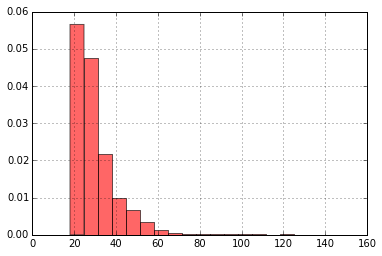

In [68]:
#plot age histogram
merged_user['AGEYR'].hist(bins=20, normed = True, color = 'r', alpha = 0.6)

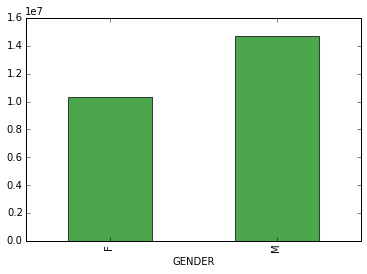

In [113]:
#plot dist of Gender bar plot
a = merged_user.groupby('GENDER').GENDER.count()
a.plot(kind='bar', color='g', alpha=0.7)

In [117]:
#plot dist of FIRSTGO bar plot
b = merged_user.groupby('FIRSTGO').FIRSTGO.count()
b

FIRSTGO
0    27095070
1      384467
Name: FIRSTGO, dtype: int64

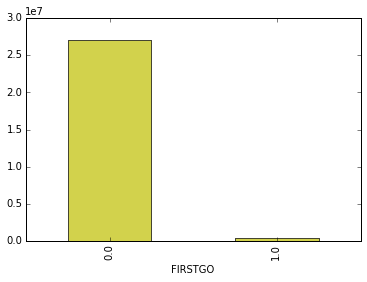

In [118]:
b.plot(kind='bar', color='y', alpha=0.7)

In [ ]:
#Create network graph using IM exchanges between each pair of users

In [40]:
###
###
###
#Graph #1
#Create a directed graph
G=nx.DiGraph()

In [41]:
#Add edges for sending from egoid to alterid
list1 = IM_table.ix[:,['EGOID','ALTERID','COUNT']][IM_table.ACTIVITY_CODE == 'S']
tuples1 = [tuple(x) for x in list1.values]
G.add_weighted_edges_from(tuples1, 'num_messages')

In [43]:
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 18530393\nNumber of edges: 89326143\nAverage in degree:   4.8205\nAverage out degree:   4.8205'

In [45]:
#Add edges for sending from alterid to egoid, i.e egoid receiving from alterid
list2 = IM_table.ix[:,['ALTERID','EGOID','COUNT']][IM_table.ACTIVITY_CODE == 'R']
tuples2 = [tuple(x) for x in list2.values]
G.add_weighted_edges_from(tuples2, 'num_messages')

In [46]:
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 21326955\nNumber of edges: 125513830\nAverage in degree:   5.8852\nAverage out degree:   5.8852'

In [59]:
#find degree centrality
a = nx.degree_centrality(G)
deg_dist = [node_num for node_num, centrality in a.items()]
nx.set_node_attributes(G, 'deg_centrality', a)

In [60]:
DataFrame(deg_dist).describe()

,0
count,21326955.000000
mean,13748709.136835
std,7938668.433079
min,0.000000
25%,6873614.000000
50%,13748582.000000
75%,20622985.000000
max,27499999.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56b4bf4588>]], dtype=object)

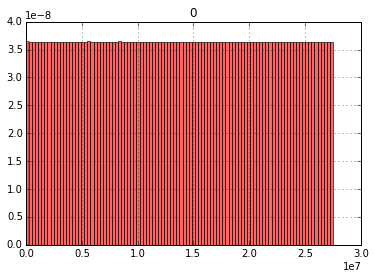

In [61]:
#plot the histogram of degree centrality
DataFrame(deg_dist).hist(bins=100, normed = True, color = 'r', alpha = 0.6)

In [62]:
#find in-degree centrality
a = nx.in_degree_centrality(G)
in_dist = [node_num for node_num, centrality in a.items()]
nx.set_node_attributes(G, 'in_deg_centrality', a)

In [63]:
DataFrame(in_dist).describe()

,0
count,21326955.000000
mean,13748709.136835
std,7938668.433079
min,0.000000
25%,6873614.000000
50%,13748582.000000
75%,20622985.000000
max,27499999.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f566b259940>]], dtype=object)

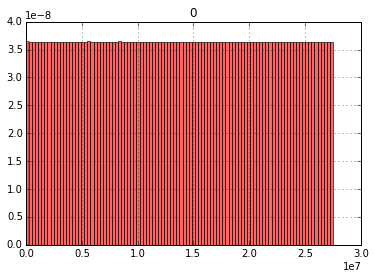

In [64]:
#plot the histogram of in-degree centrality
DataFrame(in_dist).hist(bins=100, normed = True, color = 'r', alpha = 0.6)

In [65]:
#find out-degree centrality
a = nx.out_degree_centrality(G)
out_dist = [node_num for node_num, centrality in a.items()]
nx.set_node_attributes(G, 'out_deg_centrality', a)

In [69]:
DataFrame(out_dist).describe()

,0
count,21326955.000000
mean,13748709.136835
std,7938668.433079
min,0.000000
25%,6873614.000000
50%,13748582.000000
75%,20622985.000000
max,27499999.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5632150438>]], dtype=object)

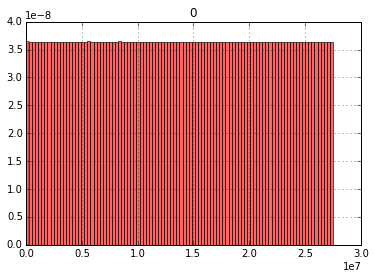

In [70]:
#plot the histogram of out-degree centrality
DataFrame(out_dist).hist(bins=100, normed = True, color = 'r', alpha = 0.6)

In [80]:
#assign user details as node's attributes
for row in merged_user.iterrows():
    if (row[0]%500000 == 0):
        print(row[0])
    if row[0] in G.nodes():
        nx.set_node_attributes(G, 'GENDER', {row[0] : row[1][1]})
        nx.set_node_attributes(G, 'AGEYR', {row[0] : row[1][2]})
        nx.set_node_attributes(G, 'COUNTRY', {row[0] : row[1][3]})
        nx.set_node_attributes(G, 'FIRSTGO', {row[0] : row[1][4]})
#realised that the check for (if row[0] in G.nodes()) is extremely slow!!! Abort!!!

0


KeyboardInterrupt: 

In [90]:
#Try alternative methods of getting graph stats (without setting node attributes in graph)
nd = [d for n,d in G.nodes_iter(data=True)]

In [92]:
nodes = DataFrame(G.nodes())

In [93]:
nd = DataFrame(nd)
nd.insert(0, 'USERID', nodes)

In [98]:
#drop variables that are being set halfway to the graph
nd2 = nd.drop(['AGEYR', 'COUNTRY','FIRSTGO', 'GENDER'],1)

In [100]:
nd2.head()

,USERID,deg_centrality,in_deg_centrality,out_deg_centrality
0,0,9.377804e-08,4.688902e-08,4.688902e-08
1,1,9.377804e-08,4.688902e-08,4.688902e-08
2,3,1.453560e-06,7.502243e-07,7.033353e-07
3,4,9.377804e-08,4.688902e-08,4.688902e-08
4,5,4.688902e-08,0.000000e+00,4.688902e-08


In [104]:
merged_user.head()

,USERID,GENDER,AGEYR,COUNTRY,FIRSTGO
0,0,M,27,238,0
1,1,M,21,238,0
2,2,NaN,NaN,NaN,0
3,3,M,39,238,0
4,4,M,29,63,0


In [ ]:
#merge with user details

In [102]:
merge_all = pd.merge(merged_user, nd2, on = 'USERID', how = 'outer')

In [105]:
merge_all.head()

,USERID,GENDER,AGEYR,COUNTRY,FIRSTGO,deg_centrality,in_deg_centrality,out_deg_centrality
0,0,M,27,238,0,9.377804e-08,4.688902e-08,4.688902e-08
1,1,M,21,238,0,9.377804e-08,4.688902e-08,4.688902e-08
2,2,NaN,NaN,NaN,0,NaN,NaN,NaN
3,3,M,39,238,0,1.453560e-06,7.502243e-07,7.033353e-07
4,4,M,29,63,0,9.377804e-08,4.688902e-08,4.688902e-08


In [106]:
#Get the deg centrality statistics by Gender 
merge_all.ix[:,[1,5,6,7]].groupby('GENDER').describe()

deg_centrality  in_deg_centrality  out_deg_centrality
GENDER                                                             
F      count    8.253647e+06       8.253647e+06        8.253647e+06
       mean     5.673128e-07       3.053596e-07        2.619531e-07
       std      2.175377e-06       1.244054e-06        1.171419e-06
       min      4.688902e-08       0.000000e+00        0.000000e+00
       25%      9.377804e-08       4.688902e-08        4.688902e-08
       50%      1.406671e-07       9.377804e-08        9.377804e-08
       75%      4.220012e-07       2.344451e-07        1.875561e-07
       max      4.137487e-04       2.612656e-04        2.191593e-04
M      count    1.204698e+07       1.204698e+07        1.204698e+07
       mean     5.634481e-07       2.551057e-07        3.083424e-07
       std      1.557386e-06       7.699527e-07        8.942942e-07
       min      4.688902e-08       0.000000e+00        0.000000e+00
       25%      9.377804e-08       4.688902e-08        4.688902e-08
       50%      1.406671e-07       4.688902e-08        9.377804e-08
       75%      4.220012e-07       1.875561e-07        2.344451e-07
       max      4.125296e-04       2.101097e-04        2.150331e-04

In [107]:
#Bin to age groups then get the deg centrality statistics by age groups
aa_bins = [18, 25, 35, 60, 100]
aa = merge_all.ix[:,[2,5,6,7]]
aa['AGEYR'] = pd.cut(aa['AGEYR'], aa_bins)
aa.groupby('AGEYR').describe()

/opt/conda/lib/python3.4/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


deg_centrality  in_deg_centrality  out_deg_centrality
AGEYR                                                                 
(18, 25]  count    7.646458e+06       7.646458e+06        7.646458e+06
          mean     5.657661e-07       2.806696e-07        2.850965e-07
          std      1.862656e-06       1.053174e-06        9.270048e-07
          min      4.688902e-08       0.000000e+00        0.000000e+00
          25%      9.377804e-08       4.688902e-08        4.688902e-08
          50%      1.406671e-07       9.377804e-08        9.377804e-08
          75%      4.688902e-07       2.344451e-07        2.344451e-07
          max      3.284107e-04       1.955741e-04        1.719889e-04
(25, 35]  count    6.473451e+06       6.473451e+06        6.473451e+06
          mean     5.622503e-07       2.695020e-07        2.927484e-07
          std      1.949814e-06       1.063373e-06        1.075226e-06
          min      4.688902e-08       0.000000e+00        0.000000e+00
          25%      9.377804e-08       4.688902e-08        4.688902e-08
          50%      1.406671e-07       4.688902e-08        9.377804e-08
          75%      4.220012e-07       1.875561e-07        2.344451e-07
          max      4.137487e-04       2.612656e-04        2.150331e-04
(35, 60]  count    3.252306e+06       3.252306e+06        3.252306e+06
          mean     5.554246e-07       2.640852e-07        2.913394e-07
          std      1.991895e-06       9.619526e-07        1.316038e-06
          min      4.688902e-08       0.000000e+00        0.000000e+00
          25%      9.377804e-08       4.688902e-08        4.688902e-08
          50%      1.406671e-07       4.688902e-08        4.688902e-08
          75%      3.751122e-07       1.875561e-07        1.875561e-07
          max      2.927282e-04       1.593289e-04        2.191593e-04
(60, 100] count    2.490360e+05       2.490360e+05        2.490360e+05
          mean     5.702788e-07       2.401516e-07        3.301272e-07
          std      2.032401e-06       8.614611e-07        1.432498e-06
          min      4.688902e-08       0.000000e+00        0.000000e+00
          25%      9.377804e-08       4.688902e-08        4.688902e-08
          50%      1.406671e-07       4.688902e-08        4.688902e-08
          75%      3.751122e-07       1.406671e-07        2.344451e-07
          max      1.127681e-04       5.420371e-05        7.914867e-05

In [108]:
#Get the deg centrality statistics by whether user is an adopter of GO platform or not
fg = merge_all.ix[:,[4,5,6,7]]
fg.groupby('FIRSTGO').describe()

deg_centrality  in_deg_centrality  out_deg_centrality
FIRSTGO                                                             
0       count    2.118871e+07       2.118871e+07        2.118871e+07
        mean     5.491462e-07       2.744272e-07        2.747190e-07
        std      1.793599e-06       9.851738e-07        9.886200e-07
        min      4.688902e-08       0.000000e+00        0.000000e+00
        25%      9.377804e-08       4.688902e-08        4.688902e-08
        50%      1.406671e-07       4.688902e-08        9.377804e-08
        75%      4.220012e-07       1.875561e-07        1.875561e-07
        max      4.137487e-04       2.612656e-04        2.191593e-04
1       count    1.382410e+05       1.382410e+05        1.382410e+05
        mean     9.746666e-07       5.096923e-07        4.649743e-07
        std      2.892146e-06       1.516469e-06        1.598942e-06
        min      4.688902e-08       0.000000e+00        0.000000e+00
        25%      9.377804e-08       4.688902e-08        4.688902e-08
        50%      2.813341e-07       1.406671e-07        1.406671e-07
        75%      8.440024e-07       4.688902e-07        3.751122e-07
        max      1.753649e-04       1.055941e-04        1.194263e-04

In [109]:
#plot the graph network. Red means adopter of Go and blue means not
Go_nodes = merge_all.ix[:,4]
w = Go_nodes.replace([1,0,np.nan],['R','B','B'])
w= w.values.tolist()

In [ ]:
nx.draw(G, node_color = w)